In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import keras
from keras.datasets import cifar10


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255., X_test/255.
y = y_train.copy()
yy = y_test.copy()

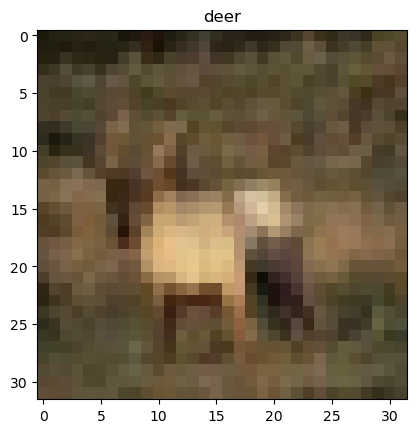

In [5]:
import matplotlib.pyplot as plt
n = 3
dict_ = {0: 'Airplane', 1: 'Auto', 2: 'Bird', 3: 'Cat', 4: 'deer', 5: 'dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}
name = dict_.get(int(y[n]))
img = X_train[n]
plt.title(name)
plt.imshow(img)
plt.show()

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
y_train.shape

(50000, 10)

In [7]:
df_1 = pd.DataFrame(y_train, columns = list(dict_.values()))
df_1

,Airplane,Auto,Bird,Cat,deer,dog,Frog,Horse,Ship,Truck
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_2 = pd.DataFrame(y_test, columns = list(dict_.values()))
df_2

,Airplane,Auto,Bird,Cat,deer,dog,Frog,Horse,Ship,Truck
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


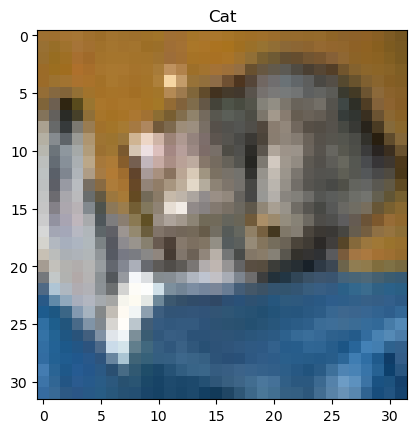

In [9]:
n = 0
dict_ = {0: 'Airplane', 1: 'Auto', 2: 'Bird', 3: 'Cat', 4: 'deer', 5: 'dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}
name = dict_.get(int(yy[n]))
img = X_test[n]
plt.title(name)
plt.imshow(img)

In [10]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True
)
test_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow(x = X_train,
                                       y = y_train,
                                       batch_size=32)

test_generator = test_datagen.flow(x = X_test,
                                   y = y_test,
                                   batch_size = 32)
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.85:
            print("\nДосягнута валідаційна точність більше 90%!")
            self.model.stop_training = True

callback = MyCallback()

In [16]:
def create_model():
  model = keras.Sequential([
      keras.layers.Conv2D(32, (3,3), activation = 'relu',padding = 'same', kernel_initializer = 'he_uniform', input_shape = (32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(0.3),
      keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform'),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Dropout(0.4),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation = 'relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(10, activation = 'softmax')
  ])

#  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(MaxPooling2D((2, 2)))
#  model.add(Dropout(0.2))
#  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(MaxPooling2D((2, 2)))
#  model.add(Dropout(0.2))
#  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#  model.add(MaxPooling2D((2, 2)))
#  model.add(Dropout(0.2))
#  model.add(Flatten())
#  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#  model.add(Dropout(0.2))
#  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer= keras.optimizers.legacy.SGD(momentum=0.9, lr = 0.001),
                loss = keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  return model


In [17]:
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=150,
                    validation_data=test_generator,
                    callbacks=[callback])

Epoch 1/150


/Users/home/anaconda3/lib/python3.10/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 116s 74ms/step - loss: 2.1432 - accuracy: 0.1978 - val_loss: 1.7305 - val_accuracy: 0.3393
Epoch 2/150
1563/1563 [==============================] - 117s 75ms/step - loss: 1.9343 - accuracy: 0.2665 - val_loss: 1.5854 - val_accuracy: 0.4035
Epoch 3/150
1563/1563 [==============================] - 115s 74ms/step - loss: 1.8540 - accuracy: 0.3042 - val_loss: 1.5423 - val_accuracy: 0.4151
Epoch 4/150
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8010 - accuracy: 0.3275 - val_loss: 1.5326 - val_accuracy: 0.4282
Epoch 5/150
1563/1563 [==============================] - 118s 75ms/step - loss: 1.7509 - accuracy: 0.3529 - val_loss: 1.6928 - val_accuracy: 0.4008
Epoch 6/150
1563/1563 [==============================] - 129s 82ms/step - loss: 1.6976 - accuracy: 0.3755 - val_loss: 1.6637 - val_accuracy: 0.4080
Epoch 7/150
1563/1563 [==============================] - 151s 96ms/step - loss: 1.6594 - accuracy: 0.3896 - val_loss: 1.5199

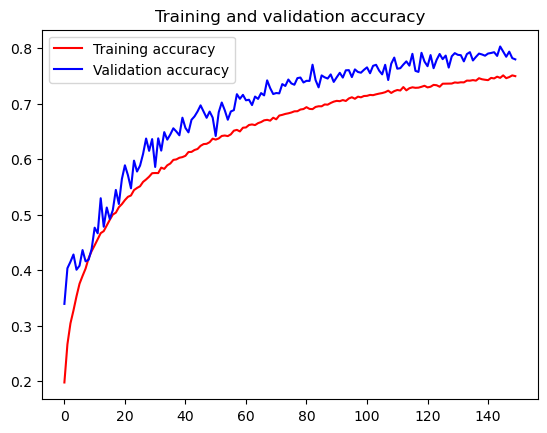

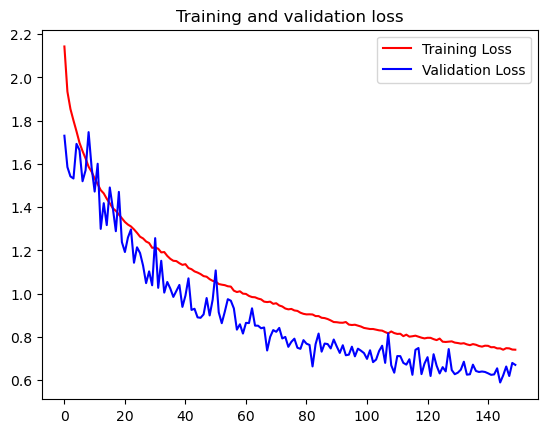

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.save('final_model_2.h5')

/Users/home/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
m = keras.models.load_model('final_model_2.h5')
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array

# img = Image.open('deer.jpg')
path = 'bird2.jpeg'
img = load_img(path, target_size=(32, 32))
  
x=img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = m.predict(images, batch_size=10)

print(classes.round())
for cl in classes:
    class_index = np.argmax(cl)  # Знаходження індексу класу з найвищою ймовірністю
    class_name = dict_.get(class_index)  # Отримання назви класу за його індексом
    print(class_name)

print(dict_.get(1))

1/1 [==============================] - 0s 155ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bird
Auto


<ipython-input-20-60fd5da909c0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=45, ha='right')


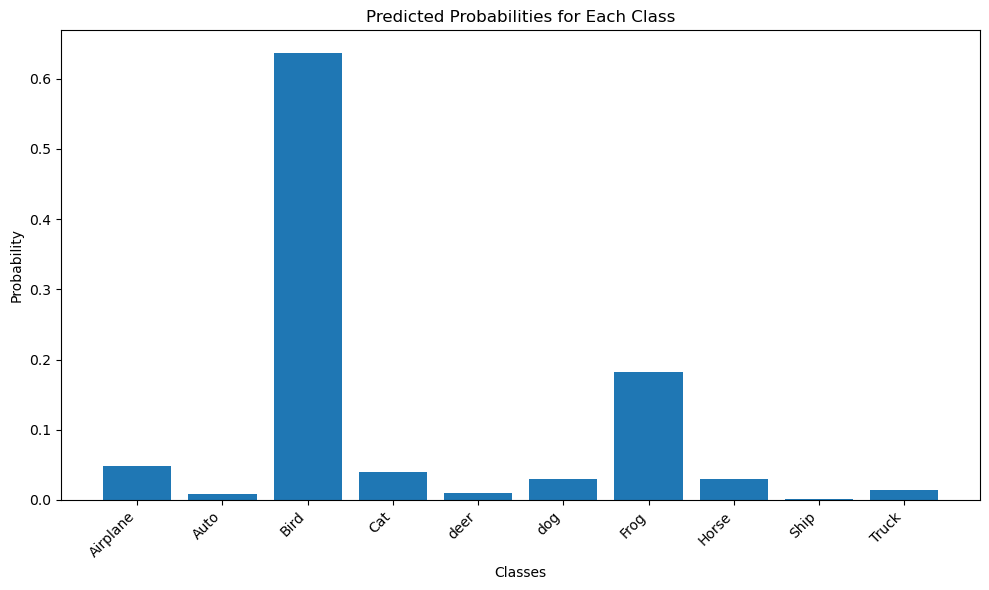

In [20]:
columns = list(dict_.values())
class_indices = np.arange(len(columns))

fig, ax = plt.subplots(figsize=(10, 6))

# Побудова графіка
ax.bar(columns, classes[0])  # Перший рядок з 'classes' містить вірогідності для одного прикладу

# Додаткові налаштування графіка
ax.set_ylabel('Probability')
ax.set_xlabel('Classes')
ax.set_title('Predicted Probabilities for Each Class')
ax.set_xticklabels(columns, rotation=45, ha='right')

# Показ графіка
plt.tight_layout()
plt.show()

In [13]:
class_

,Airplane,Auto,Bird,Cat,deer,dog,Frog,Horse,Ship,Truck
0,0.049098,0.008141,0.636968,0.039171,0.009631,0.029716,0.182185,0.02934,0.001907,0.013844
